# One Shot Learning with Siamese Networks

This is the jupyter notebook that accompanies

## Imports
All the imports are defined here

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from models import SiameseNetwork, TripletNetwork
from datasets import MadoriDataset, TriMadoriDataset
from loss import ContrastiveLoss, TripletLoss
from options import Config
from tqdm import tqdm
from torch import optim
from torch.utils.data import DataLoader
from torch.nn import functional as F
import torch
import pandas as pd

## Helper functions
Set of helper functions

In [2]:
def imshow(img1, img2):
    img1 = TF.to_pil_image(img1, mode='L')
    img2 = TF.to_pil_image(img2, mode='L')
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    plt.imshow(img1)
    plt.subplot(122)
    plt.imshow(img2)
    plt.show()    
    
def show_plot(train_loss, val_loss):
    plt.plot(train_loss, label='train_loss')
    plt.plot(val_loss, label='val_loss')
    plt.legend()
    plt.grid()
    plt.show()
    
def show_pred(test_results_0, test_results_1):
    plt.figure(figsize=(15, 5))
    plt.plot(test_results_0, label='pred distance of similar floorplans')
    plt.plot(test_results_1, label='pred distance of different floorplans')
    plt.legend()
    plt.grid()
    plt.savefig('../output/triplet/test.png')
    plt.show()

## Some simple testing

In [3]:
epoch_test = 0
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
net = TripletNetwork().to(device)
net.load_state_dict(torch.load(f'{Config.checkpoint_dir}/best_val_triplet.pth'))
test_dataloader = DataLoader(TriMadoriDataset(test=True), 
                             shuffle=False, 
                             batch_size=1)
print(len(test_dataloader))

----
613
613


In [4]:
net.eval()
test_results_0 = []
test_results_1 = []
with torch.no_grad():
    for batch_no, data in enumerate(test_dataloader):
        
        anchor, neg, pos = data
        anchor, neg, pos = anchor.to(device), neg.to(device) , pos.to(device)
        anchor_vec, neg_vec, pos_vec = net(anchor, neg, pos)
        
        dis_anchor_neg = F.pairwise_distance(anchor_vec, neg_vec)
        dis_anchor_pos = F.pairwise_distance(anchor_vec, pos_vec)
        
        print(f'anchor_neg: {dis_anchor_neg.item()}, anchor_pos: {dis_anchor_pos.item()}')
        
        test_results_1 += [dis_anchor_neg.item()]
        test_results_0 += [dis_anchor_pos.item()]

anchor_neg: 29.29425811767578, anchor_pos: 13.491315841674805
anchor_neg: 35.35044860839844, anchor_pos: 12.178937911987305
anchor_neg: 27.152559280395508, anchor_pos: 12.557061195373535
anchor_neg: 26.207000732421875, anchor_pos: 7.108613014221191
anchor_neg: 22.890398025512695, anchor_pos: 17.01052474975586
anchor_neg: 40.231842041015625, anchor_pos: 22.113117218017578
anchor_neg: 31.85729217529297, anchor_pos: 8.75738525390625
anchor_neg: 32.93766784667969, anchor_pos: 23.10356330871582
anchor_neg: 23.69015884399414, anchor_pos: 11.1983060836792
anchor_neg: 32.85916519165039, anchor_pos: 20.241161346435547
anchor_neg: 25.068784713745117, anchor_pos: 6.365667343139648
anchor_neg: 10.599138259887695, anchor_pos: 11.414406776428223
anchor_neg: 20.344018936157227, anchor_pos: 13.503630638122559
anchor_neg: 22.39774513244629, anchor_pos: 12.999311447143555
anchor_neg: 19.79415512084961, anchor_pos: 17.241600036621094
anchor_neg: 12.740524291992188, anchor_pos: 2.5800540447235107
anchor_n

anchor_neg: 38.1877326965332, anchor_pos: 9.075467109680176
anchor_neg: 35.130882263183594, anchor_pos: 22.680238723754883
anchor_neg: 17.06255531311035, anchor_pos: 22.91048240661621
anchor_neg: 28.501482009887695, anchor_pos: 9.871281623840332
anchor_neg: 20.984403610229492, anchor_pos: 14.596372604370117
anchor_neg: 42.256500244140625, anchor_pos: 19.503019332885742
anchor_neg: 35.17434310913086, anchor_pos: 7.87937593460083
anchor_neg: 18.358409881591797, anchor_pos: 3.2842957973480225
anchor_neg: 18.46013069152832, anchor_pos: 23.576208114624023
anchor_neg: 15.091689109802246, anchor_pos: 10.023613929748535
anchor_neg: 46.068382263183594, anchor_pos: 6.727444648742676
anchor_neg: 60.05217742919922, anchor_pos: 11.529370307922363
anchor_neg: 23.347562789916992, anchor_pos: 15.320878028869629
anchor_neg: 38.60322952270508, anchor_pos: 9.701857566833496
anchor_neg: 32.790672302246094, anchor_pos: 14.339499473571777
anchor_neg: 25.018672943115234, anchor_pos: 18.453144073486328
anchor

anchor_neg: 17.52312469482422, anchor_pos: 19.865224838256836
anchor_neg: 47.9380989074707, anchor_pos: 14.950392723083496
anchor_neg: 28.23360252380371, anchor_pos: 16.864744186401367
anchor_neg: 34.53545379638672, anchor_pos: 3.3783884048461914
anchor_neg: 27.841737747192383, anchor_pos: 10.30976390838623
anchor_neg: 18.46924591064453, anchor_pos: 23.407487869262695
anchor_neg: 15.702709197998047, anchor_pos: 6.96545934677124
anchor_neg: 57.42280197143555, anchor_pos: 7.9830217361450195
anchor_neg: 9.14201545715332, anchor_pos: 22.855390548706055
anchor_neg: 18.789161682128906, anchor_pos: 11.365857124328613
anchor_neg: 38.662410736083984, anchor_pos: 21.471214294433594
anchor_neg: 30.317157745361328, anchor_pos: 8.330750465393066
anchor_neg: 24.755390167236328, anchor_pos: 8.888474464416504
anchor_neg: 31.328527450561523, anchor_pos: 12.576258659362793
anchor_neg: 46.53352355957031, anchor_pos: 9.772852897644043
anchor_neg: 29.952539443969727, anchor_pos: 6.983456611633301
anchor_ne

anchor_neg: 56.87842559814453, anchor_pos: 16.91684913635254
anchor_neg: 15.78977108001709, anchor_pos: 17.870798110961914
anchor_neg: 14.495434761047363, anchor_pos: 15.650776863098145
anchor_neg: 43.05756378173828, anchor_pos: 8.783902168273926
anchor_neg: 37.202980041503906, anchor_pos: 16.38793182373047
anchor_neg: 27.25995635986328, anchor_pos: 5.630570888519287
anchor_neg: 21.895992279052734, anchor_pos: 17.5085391998291
anchor_neg: 22.798133850097656, anchor_pos: 11.172183990478516
anchor_neg: 31.13019371032715, anchor_pos: 14.490093231201172
anchor_neg: 5.183509826660156, anchor_pos: 7.931350231170654
anchor_neg: 53.31714630126953, anchor_pos: 10.843721389770508
anchor_neg: 31.03647232055664, anchor_pos: 12.34790325164795
anchor_neg: 32.757415771484375, anchor_pos: 10.32729434967041
anchor_neg: 30.634557723999023, anchor_pos: 17.35184669494629
anchor_neg: 30.15900230407715, anchor_pos: 25.814361572265625
anchor_neg: 35.62638473510742, anchor_pos: 9.951546669006348
anchor_neg: 2

anchor_neg: 22.354570388793945, anchor_pos: 8.988889694213867
anchor_neg: 36.883995056152344, anchor_pos: 6.25263786315918
anchor_neg: 29.052900314331055, anchor_pos: 13.3645658493042
anchor_neg: 23.361865997314453, anchor_pos: 10.629693984985352
anchor_neg: 38.44023132324219, anchor_pos: 11.474211692810059
anchor_neg: 56.976524353027344, anchor_pos: 10.24316692352295
anchor_neg: 22.497758865356445, anchor_pos: 10.594149589538574
anchor_neg: 17.527315139770508, anchor_pos: 19.23666000366211
anchor_neg: 29.92042350769043, anchor_pos: 4.6120734214782715
anchor_neg: 35.59328079223633, anchor_pos: 8.970120429992676
anchor_neg: 22.368927001953125, anchor_pos: 17.13820457458496
anchor_neg: 26.75339126586914, anchor_pos: 28.02910804748535
anchor_neg: 32.54319381713867, anchor_pos: 13.249811172485352
anchor_neg: 30.04667854309082, anchor_pos: 9.055399894714355
anchor_neg: 38.0506591796875, anchor_pos: 18.573209762573242
anchor_neg: 55.157615661621094, anchor_pos: 4.880789756774902
anchor_neg: 

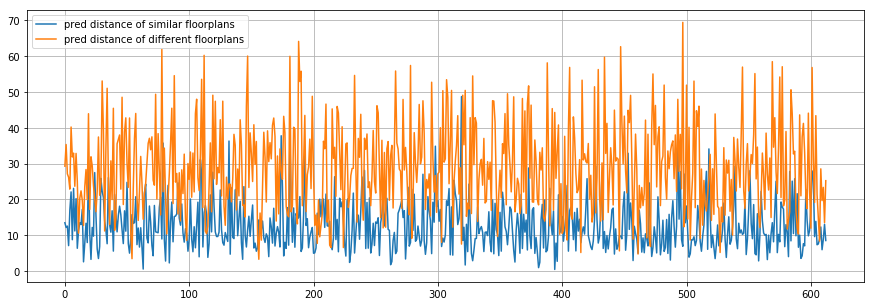

In [5]:
show_pred(test_results_0, test_results_1)

### build plot from loss file

In [ ]:
with open('./output/triplet/loss.txt') as f:
    lines = f.readlines()
f.close()

In [ ]:
train_loss = []
val_loss = []
for line in lines:
    
    item1, item2 = line.split(',')
    train_loss += [float(item1.split()[-1])]
    val_loss += [float(item2.split()[-1])]
    
df = pd.DataFrame({'train_loss': train_loss[:], 'val_loss': val_loss[:]})
df.plot(grid=True, title='contrastive loss curve')

In [ ]:
fig = df.plot(grid=True, title='triplet loss curve').get_figure()

fig.savefig('./output/triplet/loss.png')